In [14]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'

In [15]:
path = './'
xtalNum = 10
fileName = 'template'+str(xtalNum)+'.root'

file = path+fileName
print("Starting:", file)

Starting: ./template10.root


In [16]:
f = r.TFile(file)
f.ls()

TFile**		./template10.root	
 TFile*		./template10.root	
  KEY: TSpline3	realTimeSpline;1	realTimeSpline
  KEY: TSpline3	masterSpline;1	newspline


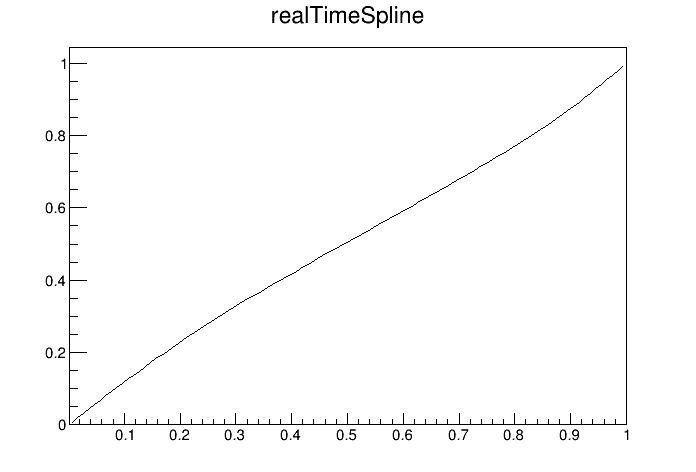

In [17]:
c = r.TCanvas()
rs = f.Get("realTimeSpline")
rs.Draw()
c.Draw()

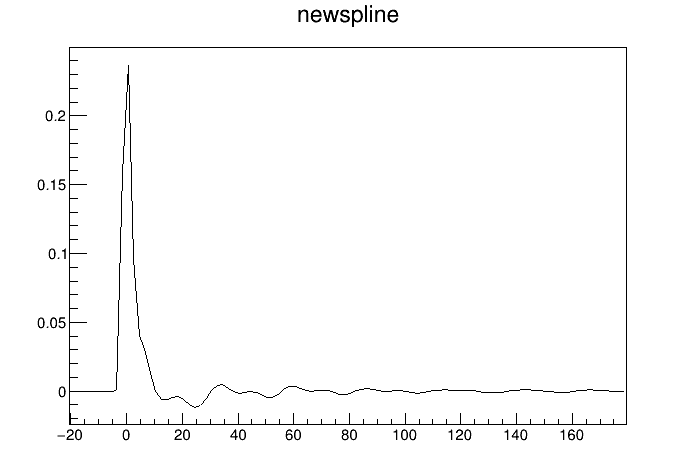

In [18]:
c = r.TCanvas()
ms = f.Get("masterSpline")
ms.Draw("")
c.Draw()

In [19]:
outfile = './templates_new/'+fileName
print("Creating:", outfile)

Creating: ./templates_new/template10.root


In [20]:
out = r.TFile(outfile,"recreate")
ms.Write()
out.Close()

SysError in <TFile::TFile>: file ./templates_new/template10.root can not be opened (No such file or directory)
Error in <TROOT::WriteTObject>: The current directory (PyROOT) is not associated with a file. The object (masterSpline) has not been written.


--- 

### Now lets to this in a loop

--- 

### Now let's create some new template files, ones which are on the calo level rather than the xtal level

In [24]:
file_path = './run2templates/beamTemplatesByCalo'
os.mkdir(file_path)

In [25]:
for calo in range(1,25):
    outfile = file_path+'/calotemplate'+str(calo)+'.root'
    for xtalNum in range(0,54):
        path = './run2templates/beamTemplates/calo'+str(calo)+'BeamTemplates/'
        fileName = 'template'+str(xtalNum)+'.root'

        file = path+fileName
        print("Starting:", file)
        try:
            f = r.TFile(file)
            ms = f.Get("masterSpline").Clone("masterSpline_xtal"+str(xtalNum))
        except:
            print("Unable to open file / spline", file)
            continue
        
        if(xtalNum == 0):
            out = r.TFile(outfile,"recreate")
            print("Creating:", outfile)
        else:
            out = r.TFile(outfile,"update")
        
        
        ms.Write()
        out.Close()

Starting: ./run2templates/beamTemplates/calo1BeamTemplates/template0.root
Creating: ./run2templates/beamTemplatesByCalo/calotemplate1.root
Starting: ./run2templates/beamTemplates/calo1BeamTemplates/template1.root
Starting: ./run2templates/beamTemplates/calo1BeamTemplates/template2.root
Starting: ./run2templates/beamTemplates/calo1BeamTemplates/template3.root
Starting: ./run2templates/beamTemplates/calo1BeamTemplates/template4.root
Starting: ./run2templates/beamTemplates/calo1BeamTemplates/template5.root
Starting: ./run2templates/beamTemplates/calo1BeamTemplates/template6.root
Starting: ./run2templates/beamTemplates/calo1BeamTemplates/template7.root
Starting: ./run2templates/beamTemplates/calo1BeamTemplates/template8.root
Starting: ./run2templates/beamTemplates/calo1BeamTemplates/template9.root
Starting: ./run2templates/beamTemplates/calo1BeamTemplates/template10.root
Starting: ./run2templates/beamTemplates/calo1BeamTemplates/template11.root
Starting: ./run2templates/beamTemplates/calo1

--- 

### Now let's create some new template files for the laser as well

In [26]:
os.mkdir('./run2templates/standardLaserTemplatesByCalo')

In [27]:
for calo in range(1,25):
    outfile = './run2templates/standardLaserTemplatesByCalo/calotemplate'+str(calo)+'.root'
    for xtalNum in range(0,54):
        path = './run2templates/standardLaserTemplates/calo'+str(calo)+'Templates/'
        fileName = 'template'+str(xtalNum)+'.root'

        file = path+fileName
        print("Starting:", file)
        try:
            f = r.TFile(file)
            ms = f.Get("masterSpline").Clone("masterSpline_xtal"+str(xtalNum))
        except:
            print("Unable to open file / spline", file)
            continue
        
        if(xtalNum == 0):
            out = r.TFile(outfile,"recreate")
            print("Creating:", outfile)
        else:
            out = r.TFile(outfile,"update")
        
        
        ms.Write()
        out.Close()

Starting: ./run2templates/standardLaserTemplates/calo1Templates/template0.root
Creating: ./run2templates/standardLaserTemplatesByCalo/calotemplate1.root
Starting: ./run2templates/standardLaserTemplates/calo1Templates/template1.root
Starting: ./run2templates/standardLaserTemplates/calo1Templates/template2.root
Starting: ./run2templates/standardLaserTemplates/calo1Templates/template3.root
Starting: ./run2templates/standardLaserTemplates/calo1Templates/template4.root
Starting: ./run2templates/standardLaserTemplates/calo1Templates/template5.root
Starting: ./run2templates/standardLaserTemplates/calo1Templates/template6.root
Starting: ./run2templates/standardLaserTemplates/calo1Templates/template7.root
Starting: ./run2templates/standardLaserTemplates/calo1Templates/template8.root
Starting: ./run2templates/standardLaserTemplates/calo1Templates/template9.root
Starting: ./run2templates/standardLaserTemplates/calo1Templates/template10.root
Starting: ./run2templates/standardLaserTemplates/calo1Te

--- 

### And finally the crossed laser templates

In [28]:
os.mkdir('./run2templates/crossedLaserTemplatesByCalo')

In [29]:
for calo in range(1,25):
    outfile = './run2templates/crossedLaserTemplatesByCalo/calotemplate'+str(calo)+'.root'
    for xtalNum in range(0,54):
        path = './run2templates/crossedLaserTemplates/calo'+str(calo)+'Templates/'
        fileName = 'template'+str(xtalNum)+'.root'

        file = path+fileName
        print("Starting:", file)
        try:
            f = r.TFile(file)
            ms = f.Get("masterSpline").Clone("masterSpline_xtal"+str(xtalNum))
        except:
            print("Unable to open file / spline", file)
            continue
        
        if(xtalNum == 0):
            out = r.TFile(outfile,"recreate")
            print("Creating:", outfile)
        else:
            out = r.TFile(outfile,"update")
        
        
        ms.Write()
        out.Close()

Starting: ./run2templates/crossedLaserTemplates/calo1Templates/template0.root
Creating: ./run2templates/crossedLaserTemplatesByCalo/calotemplate1.root
Starting: ./run2templates/crossedLaserTemplates/calo1Templates/template1.root
Starting: ./run2templates/crossedLaserTemplates/calo1Templates/template2.root
Starting: ./run2templates/crossedLaserTemplates/calo1Templates/template3.root
Starting: ./run2templates/crossedLaserTemplates/calo1Templates/template4.root
Starting: ./run2templates/crossedLaserTemplates/calo1Templates/template5.root
Starting: ./run2templates/crossedLaserTemplates/calo1Templates/template6.root
Starting: ./run2templates/crossedLaserTemplates/calo1Templates/template7.root
Starting: ./run2templates/crossedLaserTemplates/calo1Templates/template8.root
Starting: ./run2templates/crossedLaserTemplates/calo1Templates/template9.root
Starting: ./run2templates/crossedLaserTemplates/calo1Templates/template10.root
Starting: ./run2templates/crossedLaserTemplates/calo1Templates/templ

In [30]:
print("all done")

all done
